In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data, img_as_float
from scipy.fft import fft2, fftshift, ifft2

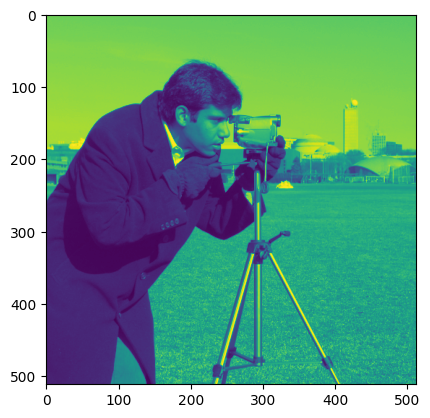

In [8]:
im = img_as_float(data.camera())
plt.imshow(im)

imfft = fftshift(fft2(im))

In [9]:
imfft

array([[-2.52156863 -0.j        , 10.07380769 +4.91589533j,
         1.96820034-13.15824845j, ..., 11.84964059-17.09728055j,
         1.96820034+13.15824845j, 10.07380769 -4.91589533j],
       [-1.36699466 +5.40737031j, -3.39080436 -2.19252522j,
         9.46665749 +0.64538438j, ..., 23.22084539 -9.6792366j ,
        -1.01704325 +8.0194191j , 11.34016253 +2.908133j  ],
       [-7.3049327  +5.15946019j, -0.56512247 -3.61655941j,
         2.65983414 +4.21116087j, ..., 14.49014287+11.662217j  ,
        -0.95717628 +4.96814188j, -7.54021008+11.2718603j ],
       ...,
       [-2.29945173 +3.72916677j, -3.674251   -0.77472j   ,
        -6.11219019 -0.39921143j, ..., -5.83793858-11.18346084j,
         0.48971543 +7.32284949j,  0.34262887 -1.65073617j],
       [-7.3049327  -5.15946019j, -7.54021008-11.2718603j ,
        -0.95717628 -4.96814188j, ..., -1.00585202-14.66864288j,
         2.65983414 -4.21116087j, -0.56512247 +3.61655941j],
       [-1.36699466 -5.40737031j, 11.34016253 -2.908133j  

In [10]:
imfft.shape

(512, 512)

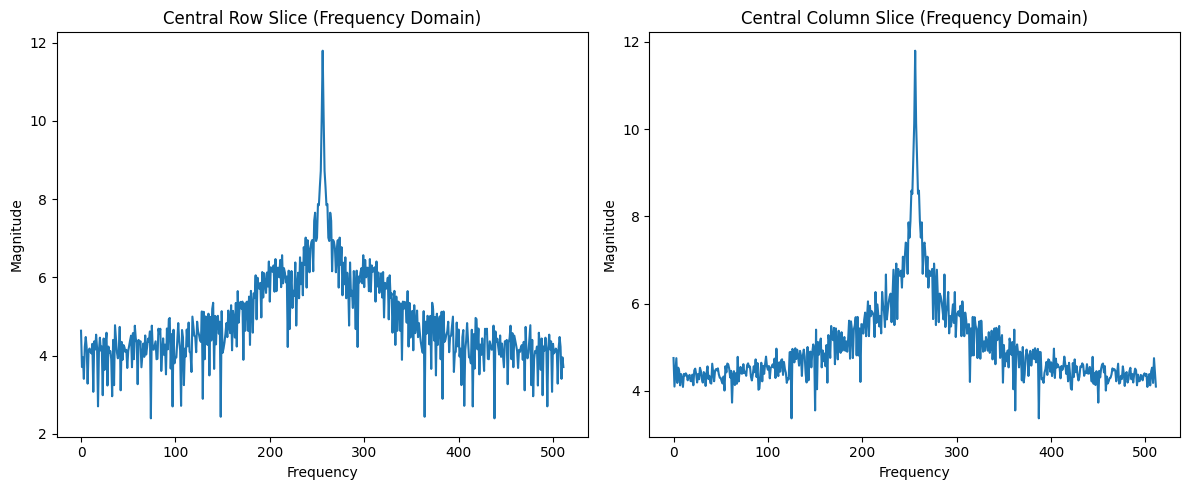

In [14]:
im = img_as_float(data.camera())  # Replace with your image, e.g., imread('image.jpg', as_gray=True)

# Compute the 2D Fourier Transform
imfft = fftshift(fft2(im))

# Compute the magnitude spectrum
# Compute the magnitude spectrum
magnitude_spectrum = np.log(1 + np.abs(imfft))

# Extract a central slice from the frequency spectrum
center_row = magnitude_spectrum[magnitude_spectrum.shape[0] // 2, :]
center_col = magnitude_spectrum[:, magnitude_spectrum.shape[1] // 2]

# Plot the slices
plt.figure(figsize=(12, 5))

# Row slice
plt.subplot(1, 2, 1)
plt.plot(center_row)
plt.title("Central Row Slice (Frequency Domain)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

# Column slice
plt.subplot(1, 2, 2)
plt.plot(center_col)
plt.title("Central Column Slice (Frequency Domain)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [22]:
class WaveletImage:
    def __init__(self, image: np.ndarray, axis: int = 1, levels: int = 2) -> None:
        self.axis = axis
        self.lo, self.hi = self.transform(image, self.axis, levels)

    @property
    def pixels(self) -> np.ndarray:
        lo = norm_image(self.lo if isinstance(self.lo, np.ndarray) else self.lo.pixels)
        hi = norm_image(self.hi if isinstance(self.hi, np.ndarray) else self.hi.pixels)
        return np.concatenate([lo, hi], axis=self.axis)

    def inverse_transform(self) -> np.ndarray:
        lo: np.ndarray = self.lo if isinstance(self.lo, np.ndarray) else self.lo.inverse_transform()
        hi: np.ndarray = self.hi if isinstance(self.hi, np.ndarray) else self.hi.inverse_transform()
        evens = (lo + hi) // 2
        odds = (lo - hi) // 2
        return interleave(evens, odds, axis=self.axis)

    @staticmethod
    def transform(image: np.ndarray, axis: int, levels: int) -> tuple[np.ndarray, np.ndarray]:
        if axis == 0:
            evens, odds = image[::2, :], image[1::2, :]
        elif axis == 1:
            evens, odds = image[:, ::2], image[:, 1::2]
        else:
            raise ValueError(f"axis '{axis}' must be 0 or 1")

        lo = WaveletImage(evens + odds, abs(axis - 1), levels - axis) if levels else evens + odds
        hi = WaveletImage(evens - odds, axis=0, levels=0) if axis == 1 else evens - odds

        return lo, hi


def norm_image(x: np.ndarray) -> np.ndarray:
    return (x - x.min()) / (x.max() - x.min())


def interleave(a: np.ndarray, b: np.ndarray, axis: int) -> np.ndarray:
    rows, cols = a.shape
    rows, cols = (rows * 2, cols) if axis == 0 else (rows, cols * 2)
    out = np.empty((rows, cols), dtype=a.dtype)
    if axis == 0:
        out[0::2] = a
        out[1::2] = b
    elif axis == 1:
        out[:, 0::2] = a
        out[:, 1::2] = b
    else:
        raise ValueError("interleave only supports axis of 0 or 1")
    return out

In [26]:
img = cv2.imread('china.jpg', cv2.IMREAD_GRAYSCALE)

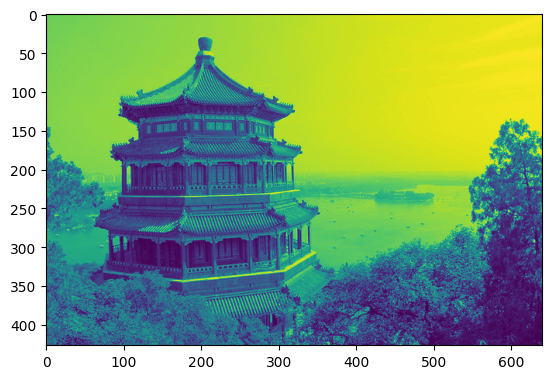

In [28]:
plt.imshow(img)

In [ ]:

image = WaveletImage(image, levels=2).pixels

plt.imshow(image, cmap="gray")
plt.show()